In [2]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [12]:
IMAGES_DIR = os.path.join('..', 'data', 'processed', 'classic-dobble')
NUM_CARDS = 57

In [14]:
def compute_quadrant_coordinates(quadrant, image_size):
    """Compute the coordinates of a specified quadrant within a square image.

    Args:
        quadrant (int): The quadrant number, ranging from 1 to 4.
        image_size (int): The size of the square image.

    Returns:
        tuple[int, int]: The upper left coordinates (x, y) of the specified quadrant within the square image.

    Raises:
        ValueError: If an invalid 'quadrant' (number) is provided.
    """
    quadrant_size = image_size // 2
    
    if quadrant == 1:  # upper right
        coords = (quadrant_size, 0)
    elif quadrant == 2:  # upper left
        coords = (0, 0)
    elif quadrant == 3:  # lower left
        coords = (0, quadrant_size)
    elif quadrant == 4:  # lower right
        coords = (quadrant_size, quadrant_size)
    else:
        raise ValueError('Invalid quadrant. Please provide a value from 1 to 4.')

    return coords


def create_tile_image(image1, image2, quadrants, bg_color=None, return_pil=True):
    """Create a tile image by combining two square images based on the specified quadrants.

    Args:
        image1 (PIL.Image.Image): The first input image to place on the tile image.
        image2 (PIL.Image.Image): The second input image to place on the tile image.
        quadrants (tuple[int, int]): Tuple of integers from 1 to 4 representing the quadrants in which
            the two images will be placed.
        bg_color (tuple[int, int, int]): The RGB color tuple for the background color.  Defaults to 'None'.
        return_pil (bool): Whether to return a PIL Image ('True') or a NumPy array ('False').  Defaults to 'True'.

    Returns:
        PIL.Image.Image or np.ndarray: The generated tile image.
    
    Raises:
        ValueError: If two identical quadrants are provided.
    """
    if quadrants[0] == quadrants[1]:
        raise ValueError('Two identical quadrants provided. Images would overlap.')

    tile_image_size = 2 * image1.width

    # Choose random background color if 'bg_color' was not specified
    if bg_color is None:
        bg_color = tuple(np.random.randint(0, 256, size=3, dtype=np.uint8))
    
    tile_image = Image.new('RGBA', (tile_image_size, tile_image_size), bg_color)

    image1_pos = compute_quadrant_coordinates(quadrants[0], tile_image_size)
    image2_pos = compute_quadrant_coordinates(quadrants[1], tile_image_size)

    tile_image.paste(image1, image1_pos, mask=image1)
    tile_image.paste(image2, image2_pos, mask=image2)

    if return_pil:
        return tile_image
    else:
        # Convert the image to a NumPy array
        tile_image_np = np.array(tile_image)
        return tile_image_np


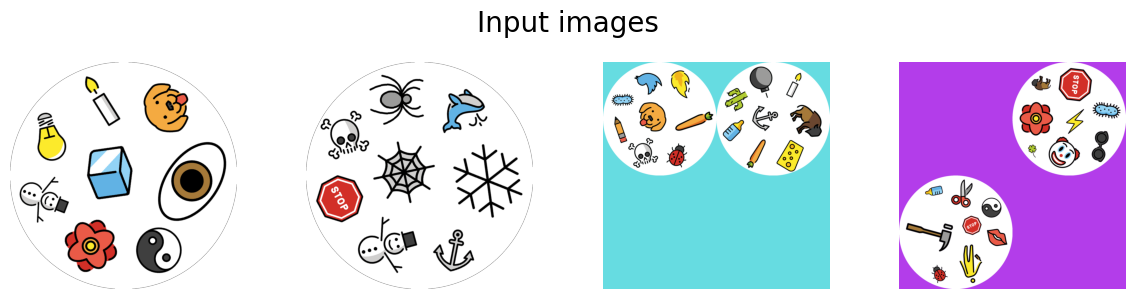

In [24]:
random.seed(42)
np.random.seed(42)

image_ids = random.sample(range(0, NUM_CARDS), 6)
filenames = [os.path.join(IMAGES_DIR, 'classic-dobble_{:03d}.png'.format(id)) for id in image_ids]
images = [Image.open(filename) for filename in filenames]

pairs_of_cards = [
    create_tile_image(images[2], images[3], (1, 2)),
    create_tile_image(images[4], images[5], (1, 3))
    ]

input_images = [images[0], images[1], pairs_of_cards[0], pairs_of_cards[1]]

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.flatten()

for count, image in enumerate(input_images):
    ax = axes[count]
    ax.imshow(image)
    ax.axis('off')

plt.suptitle('Input images', size=20)
plt.tight_layout()
plt.show()